# Dimensionality reduction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## t-SNE

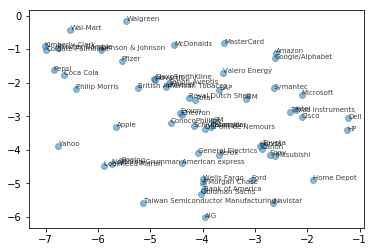

In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

movements = pd.read_csv('stocks.csv')
companies = movements.iloc[:,0].values.tolist()
movements = np.array(movements.drop(movements.columns[[0]], axis=1))

# Normalize the movements
normalized_movements = normalize(movements)

model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(normalized_movements)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=7, alpha=0.75)
plt.show()

## PCA

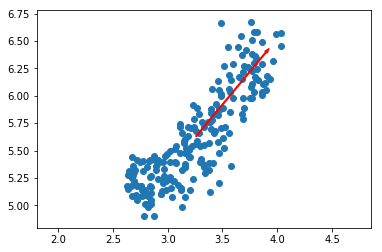

In [18]:
from sklearn.decomposition import PCA

grains = pd.read_csv('seeds-width-vs-length.csv', header=None)
grains = np.array(grains)

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()
model.fit(grains)
mean = model.mean_

# Get the first principal component
first_pc = model.components_[0,:]

plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.axis('equal')
plt.show()

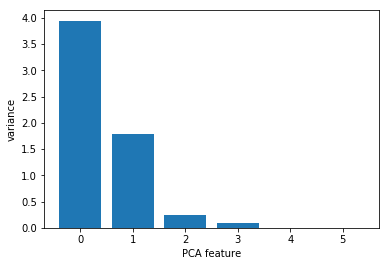

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

samples = pd.read_csv('fish.csv', header=None)
samples = np.array(samples.drop(samples.columns[[0]], axis=1))

scaler = StandardScaler()
pca = PCA()

# Create pipeline
pipeline = make_pipeline(scaler, pca)
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [22]:
from sklearn.preprocessing import scale
scaled_samples = scale(samples)

# Create a PCA instance with 2 components
pca = PCA(n_components=2)
pca.fit(scaled_samples)

# Transform the scaled samples
pca_features = pca.transform(scaled_samples)
print(pca_features.shape)

(85, 2)


# NMF

In [6]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

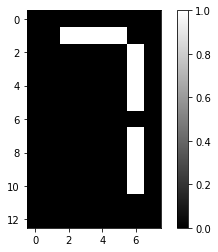

In [7]:
samples = pd.read_csv('lcd-digits.csv', header=None)
samples = np.array(samples)

# Select the 0th row (first image)

digit = samples[0,:]
show_as_image(digit)

## Identify meaningful parts of image samples using NMF

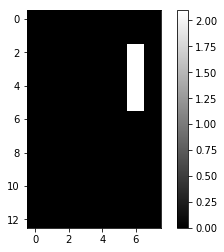

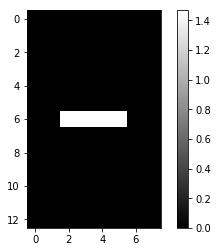

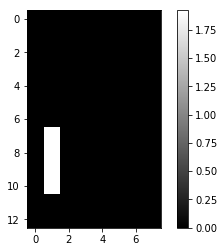

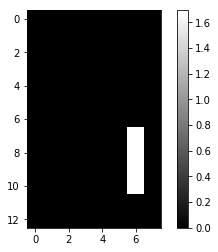

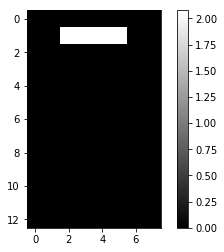

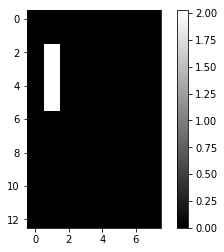

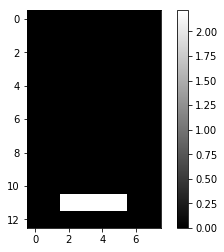

In [8]:
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(7)

# fit NMF to image data to identify important pixel groups
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

### In contrast, PCA doesn't learn seperate components but rather a good general representation

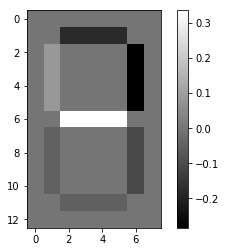

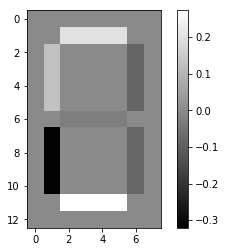

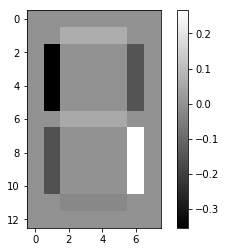

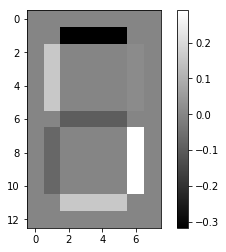

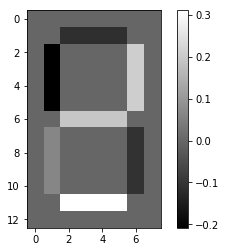

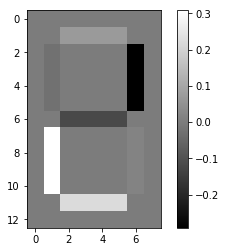

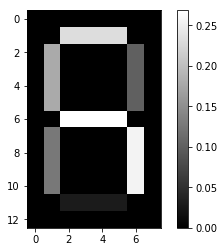

In [9]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)